In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

<AxesSubplot:xlabel='Month'>

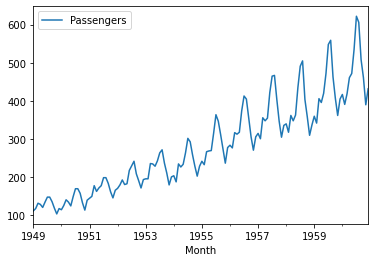

In [2]:
df = pd.read_csv(r"C:\Users\Emilie Berger\Downloads\airline_passengers.csv", index_col='Month', parse_dates=True)
df.plot()

# reminder that this dataset is not stationary
# both trend and seasonal component to this data

In [3]:
# adfuller function
# In statistics, an augmented Dickey–Fuller test tests 
# the null hypothesis that a unit root is present in a time series sample

adfuller(df['Passengers'])

# from statsmodel documentation:
# 2 key pieces we interested in are
# test statistics and particularly p-value
# test-stat used to compute p-value
# Here, 1st number is test-stat adf, 2nd p-value

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [4]:
def adf(x):
    res = adfuller(x)
    print("Test-Statistic:", res[0])
    print("P-Value:", res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

In [5]:
adf(df['Passengers'])

Test-Statistic: 0.8153688792060423
P-Value: 0.9918802434376409
Non-Stationary


In [6]:
# does it work for an actual stationary signal?
# sample from the standard normal --> entire dist remains constant over time

adf(np.random.randn(100))

Test-Statistic: -10.111930430010606
P-Value: 9.950866227581219e-18
Stationary


In [7]:
# gamma dist --> does not change over time

adf(np.random.gamma(1, 1, 100))

Test-Statistic: -10.144978530147641
P-Value: 8.231256659200043e-18
Stationary


In [8]:
# Log of Passengers col

df['LogPassengers'] = np.log(df['Passengers'])
adf(df['LogPassengers'])

Test-Statistic: -1.7170170891069714
P-Value: 0.4223667747703857
Non-Stationary


<AxesSubplot:xlabel='Month'>

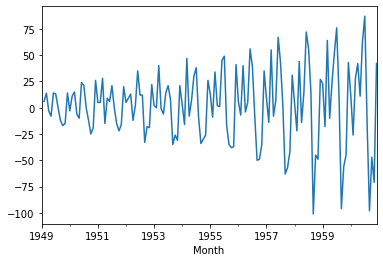

In [9]:
df['Diff'] = df['Passengers'].diff()
df['Diff'].plot()

# signal var appears to increase over time
# --> non-stationary

In [10]:
adf(df['Diff'].dropna()) # always 1 n/a value with diff (1st)

Test-Statistic: -2.8292668241699874
P-Value: 0.05421329028382711
Non-Stationary


<AxesSubplot:xlabel='Month'>

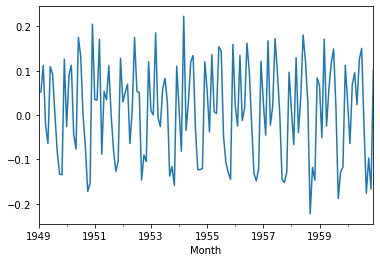

In [11]:
# 1st diff of Log Passengers

df['DiffLog'] = df['LogPassengers'].diff()
df['DiffLog'].plot()

# signal more stationary

In [12]:
adf(df['DiffLog'].dropna())

# still non-stationary

Test-Statistic: -2.717130598388145
P-Value: 0.0711205481508568
Non-Stationary


In [14]:
# stock prices

stocks = pd.read_csv(r"C:\Users\Emilie Berger\Downloads\sp500sub.csv", index_col='Date', parse_dates=True)
stocks.head()

Open   High    Low  Close  Adj Close     Volume  Name
Date                                                              
2010-01-04   9.22   9.51   9.17   9.50       9.50  1865400.0  INCY
2010-01-05   9.51  10.29   9.45  10.27      10.27  7608900.0  INCY
2010-01-06  10.38  11.09  10.35  11.00      11.00  8046700.0  INCY
2010-01-07  11.00  11.06  10.62  10.82      10.82  3680300.0  INCY
2010-01-08  10.82  11.00  10.75  10.94      10.94  1529300.0  INCY

In [16]:
goog = stocks[stocks['Name'] == 'GOOG'][['Close']]
goog['LogPrice'] = np.log(goog['Close'])
goog['LogRet'] = goog['LogPrice'].diff()
goog.head()

Close  LogPrice    LogRet
Date                                      
2010-01-04  312.204773  5.743659       NaN
2010-01-05  310.829926  5.739246 -0.004413
2010-01-06  302.994293  5.713714 -0.025532
2010-01-07  295.940735  5.690159 -0.023555
2010-01-08  299.885956  5.703402  0.013243

<AxesSubplot:xlabel='Date'>

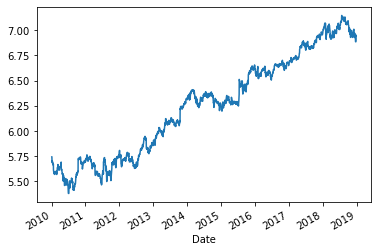

In [17]:
goog['LogPrice'].plot()

In [19]:
adf(goog['LogPrice'])

Test-Statistic: -0.4181902578906125
P-Value: 0.9070170677498409
Non-Stationary


In [20]:
goog['LogRet'].plot()

<AxesSubplot:xlabel='Date'>

In [21]:
adf(goog['LogRet'].dropna())

Test-Statistic: -46.66748022773677
P-Value: 0.0
Stationary


In [22]:
sbux = stocks[stocks['Name'] == 'SBUX'][['Close']]
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['LogRet'] = sbux['LogPrice'].diff()
sbux.head()

Close  LogPrice    LogRet
Date                                  
2010-01-04  11.525  2.444519       NaN
2010-01-05  11.795  2.467676  0.023157
2010-01-06  11.710  2.460443 -0.007233
2010-01-07  11.680  2.457878 -0.002565
2010-01-08  11.640  2.454447 -0.003431

In [23]:
sbux['LogPrice'].plot()

<AxesSubplot:xlabel='Date'>

In [24]:
adf(sbux['LogPrice'])

Test-Statistic: -1.9020133583900003
P-Value: 0.331114556985376
Non-Stationary


<AxesSubplot:xlabel='Date'>

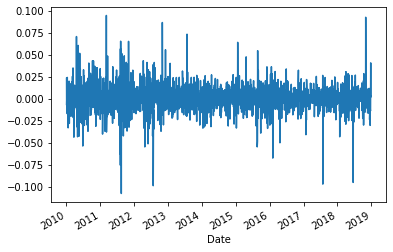

In [25]:
sbux['LogRet'].plot()

In [26]:
adf(sbux['LogRet'].dropna())

Test-Statistic: -30.086501426958048
P-Value: 0.0
Stationary
